# Speed test
Thanks to the helpful feedback from [Ron](https://medium.com/@rweverwijk) I looked into optimizing of the query.
I will look into 2 things: Unwind VS constructed query, and the effect of query cashing.

In [1]:
import os
import time

import numpy as np
from tqdm import tqdm
from py2neo import Graph

from app.encode_for_neo4j import encode2neo4j
from app.pubchem_connections import get_compound_from_synonym_name

# Connect with an empty 
url = "bolt://localhost:7687"
user = "neo4j"
pswd = "testpassword"

graph = Graph(url, auth=(user, pswd))


In [2]:
synonym_name = "nsc357683"
compounds = await get_compound_from_synonym_name(synonym_name)
compound = compounds[0]

In [3]:
graph.run("MATCH (n) DETACH DELETE n")

(No data)

In [4]:
compound_id = compound["CID"] 
synonyms = compound["Synonym"]

compound_id_str = f"compound:cid{compound_id}"
all_times_constructed = []


query = f""" 
    MERGE (c:Compound {{pubChemCompId: "{compound_id_str}"}})
    """
for idx, s in enumerate(synonyms):
    query += f"""MERGE (s{idx}:Synonym {{pubChemSynId: "{s.id}", name: "{encode2neo4j(s.name)}"}})
    MERGE (c)<-[:IS_ATTRIBUTE_OF]-(s{idx})
    """

for i in range(1000):
    start = time.time()
    graph.run(query)
    all_times_constructed.append(time.time()-start)

print("median time:", np.median(all_times_constructed))
print("mean time:", np.mean(all_times_constructed))

median time: 0.0020040273666381836
mean time: 0.0034471886157989504


In [5]:
graph.run("MATCH (n) DETACH DELETE n")

(No data)

In [6]:
compound_id = compound["CID"] 
synonyms = [s.dict() for s in compound["Synonym"]]

compound_id_str = f"compound:cid{compound_id}"

query = """ 
    UNWIND $synonyms as synonym
    MERGE (c:Compound {pubChemCompId: $compound_id})
    MERGE (s:Synonym {pubChemSynId: synonym.id, name: synonym.name})
    MERGE (c)<-[:IS_ATTRIBUTE_OF]-(s)
    """

all_times_unwind = []
for i in range(1000):
    start = time.time()
    graph.run(query, compound_id=compound_id_str, synonyms=synonyms)
    all_times_unwind.append(time.time()-start)

print("median time:", np.median(all_times_unwind))
print("mean time:", np.mean(all_times_unwind))

median time: 0.002000570297241211
mean time: 0.002441035509109497


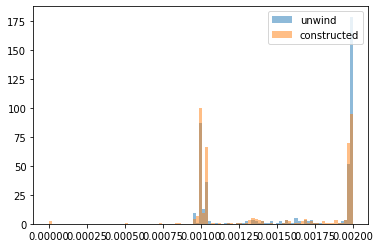

In [7]:
import random
import numpy
from matplotlib import pyplot

bins = numpy.linspace(0, 0.002, 100)

pyplot.hist(all_times_unwind, bins, alpha=0.5, label='unwind')
pyplot.hist(all_times_constructed, bins, alpha=0.5, label='constructed')
pyplot.legend(loc='upper left')
pyplot.show()

## Different queries


In [8]:
synonym_names = ['123127',
 '19893',
 '713724',
 '713725',
 '713730',
 '713733',
 '713736',
 '713737',
 '713738',
 '713750',
 '713752',
 '713787',
 '713793',
 '713796',
 '713797',
 '713827',
 '713828',
 '713829',
 '713830',
 '713831',
 '713832',
 '714000',
 '714001',
 '714002',
 '714004',
 '243929',
 '319972',
 '326197',
 '339866',
 '345311',
 '355063',
 '357826',
 '406352',
 '628343',
 '637289',
 '637291',
 '637309',
 '639666',
 '639767',
 '641182',
 '715408',
 '715643',
 '715759',
 '715775',
 '715776',
 '715777',
 '100723',
 '108212',
 '108696',
 '127922',
 '132390',
 '136475',
 '138367',
 '144198',
 '159065',
 '163341',
 '163482',
 '163972',
 '164985',
 '166291',
 '173908',
 '176408',
 '201428',
 '201438',
 '201485',
 '201680',
 '201835',
 '218476',
 '230683',
 '234214',
 '239397',
 '246112',
 '251757',
 '251805',
 '59791',
 '60666',
 '61998',
 '6280',
 '63357',
 '78476',
 '83223',
 '87890',
 '88871',
 '88876',
 '88941',
 '89258',
 '89280',
 '9358',
 '94265',
 '96887',
 '49520',
 '172924',
 '710546',
 '713169',
 '713170',
 '713177',
 '713178',
 '713302',
 '713303',
 '713304',
 '713305',
 '713306',
 '713322',
 '713324',
 '713325',
 '713336',
 '713341',
 '713368',
 '713843',
 '714074',
 '714075',
 '714076',
 '714091',
 '714092',
 '714096',
 '642492',
 '711929',
 '711932',
 '711933',
 '711934',
 '713071',
 '713072',
 '713726',
 '713727',
 '713759',
 '713760',
 '713761',
 '713790',
 '713903',
 '713910',
 '713911',
 '713912',
 '713913',
 '713914',
 '713915',
 '713917',
 '713918',
 '713922',
 '713923',
 '713924',
 '714018',
 '715135',
 '715136',
 '715138',
 '158378',
 '647928',
 '658926',
 '658928',
 '663314',
 '663315',
 '664150',
 '666732',
 '714122',
 '714126',
 '714203',
 '714206',
 '714407',
 '714410',
 '714411',
 '714415',
 '714418',
 '714420',
 '714421',
 '714528',
 '714530',
 '714531',
 '714895',
 '666457',
 '713210',
 '713334',
 '713591',
 '713657',
 '713661',
 '713799',
 '711177',
 '711898',
 '712914',
 '713166',
 '713197',
 '713198',
 '713587',
 '713295',
 '714512',
 '714517',
 '714518',
 '252188',
 '254304',
 '260922',
 '268918',
 '282150',
 '283477',
 '289517',
 '289899',
 '301480',
 '302991',
 '306916',
 '308809',
 '310340',
 '334704',
 '649890',
 '714328',
 '714369',
 '714375',
 '714929',
 '714932',
 '716434',
 '714370',
 '714445',
 '714446',
 '714601',
 '714602',
 '714603',
 '714604',
 '714605',
 '714607',
 '714608',
 '714198',
 '714538',
 '714616',
 '714618',
 '714636',
 '714655',
 '714656',
 '714659',
 '714679',
 '714680',
 '714681',
 '714682',
 '714798',
 '715114',
 '715116',
 '715117',
 '715119',
 '715120',
 '715121',
 '715124',
 '715126',
 '715131',
 '715132',
 '715141',
 '715142',
 '715144',
 '715145',
 '715146',
 '715175',
 '715176',
 '715186',
 '715190',
 '715191',
 '715192',
 '715058',
 '715059',
 '715060',
 '715061',
 '715062',
 '715063',
 '715064',
 '715065',
 '715066',
 '715067',
 '715068',
 '715069',
 '715070',
 '716054',
 '716055',
 '716056',
 '325308',
 '714653',
 '714654',
 '714660',
 '714661',
 '714662',
 '714663',
 '714666',
 '714671',
 '714672',
 '714673',
 '714674',
 '714675',
 '714676',
 '714689',
 '714690',
 '715082',
 '715083',
 '715100',
 '715134',
 '714384',
 '714390',
 '714391',
 '714392',
 '715406',
 '715407',
 '715804',
 '715805',
 '641183',
 '643172',
 '646395',
 '652884',
 '658929',
 '659718',
 '661440',
 '666758',
 '668523',
 '673822',
 '673824',
 '715778',
 '714121',
 '714123',
 '714200',
 '714201',
 '714204',
 '714205',
 '714435',
 '714683',
 '714684',
 '714685',
 '714686',
 '714688',
 '715147',
 '715148',
 '715149',
 '715155',
 '715174',
 '715197',
 '715220',
 '715221',
 '715223',
 '715224',
 '715226',
 '715227',
 '715228',
 '715229',
 '715230',
 '715261',
 '715263',
 '715264',
 '715266',
 '715267',
 '715268',
 '715269',
 '715277',
 '715280',
 '715285',
 '715286',
 '715288',
 '715293',
 '715071',
 '715072',
 '715080',
 '715084',
 '715085',
 '715091',
 '715092',
 '715093',
 '715098',
 '715099',
 '715101',
 '715103',
 '714377',
 '714378',
 '714379',
 '714380',
 '714383',
 '714423',
 '714424',
 '714430',
 '714432',
 '714448',
 '714451',
 '714452',
 '714454',
 '714456',
 '714611',
 '714620',
 '714631',
 '714632',
 '714645',
 '714652',
 '712399',
 '713771',
 '714363',
 '711783',
 '716544',
 '715332',
 '715333',
 '715335',
 '715339',
 '715399',
 '715400',
 '715401',
 '715425',
 '715433',
 '715563',
 '715565',
 '715570',
 '715578',
 '715583',
 '715584',
 '715585',
 '715586',
 '715587',
 '715588',
 '715589',
 '715593',
 '715594',
 '715595',
 '715596',
 '715597',
 '715598',
 '715599',
 '715652',
 '715669',
 '715683',
 '715695',
 '715711',
 '715716',
 '715718',
 '715719',
 '715724',
 '715729',
 '715744',
 '715745',
 '715746',
 '715748',
 '715763',
 '715764',
 '715767',
 '715768',
 '715367',
 '715368',
 '715422',
 '715430',
 '715431',
 '715435',
 '715436',
 '715437',
 '715443',
 '715447',
 '715448',
 '715452',
 '715455',
 '715460',
 '715461',
 '715463',
 '715466',
 '715469',
 '715470',
 '715471',
 '715472',
 '715473',
 '715486',
 '715569',
 '715572',
 '715708',
 '715710',
 '715713',
 '715714',
 '715715',
 '715722',
 '715726',
 '715727',
 '715732',
 '715733',
 '13162',
 '373980',
 '374653',
 '377143',
 '378881',
 '379587',
 '400206',
 '400244',
 '400905',
 '401101',
 '401166',
 '402592',
 '403546',
 '404886',
 '405361',
 '405788',
 '405789',
 '405961',
 '406666',
 '407389',
 '407567',
 '408181',
 '408301',
 '408478',
 '408726',
 '409425',
 '409719',
 '716244',
 '715321',
 '715322',
 '715325',
 '715327',
 '715328',
 '715329',
 '715334',
 '715343',
 '715344',
 '715487',
 '715496',
 '715497',
 '715500',
 '715503',
 '715513',
 '715516',
 '715518',
 '715520',
 '715522',
 '715523',
 '715524',
 '715527',
 '715528',
 '715735',
 '715737',
 '715740',
 '715742',
 '715743',
 '715766',
 '715806',
 '715808',
 '715810',
 '715811',
 '715812',
 '715434',
 '715438',
 '715450',
 '715451',
 '715453',
 '715457',
 '715480',
 '715481',
 '715484',
 '715488',
 '715489',
 '715529',
 '715530',
 '715539',
 '715541',
 '715542',
 '715543',
 '715544',
 '715545',
 '715546',
 '715547',
 '715548',
 '715550',
 '715551',
 '715556',
 '715557',
 '715558',
 '715559',
 '715561',
 '715562',
 '715564',
 '715568',
 '711784',
 '712400',
 '700264',
 '713791',
 '602132',
 '602613',
 '607740',
 '608429',
 '610578',
 '615466',
 '652886',
 '652888',
 '658900',
 '659102',
 '659424',
 '660019',
 '663855',
 '663857',
 '667644',
 '667645',
 '708781',
 '708782',
 '708783',
 '708784',
 '708785',
 '708786',
 '708787',
 '708788',
 '708789',
 '708790',
 '716782',
 '716793',
 '716802',
 '715369',
 '715575',
 '715577',
 '715580',
 '715581',
 '715582',
 '715590',
 '715592',
 '715638',
 '715639',
 '715647',
 '715648',
 '715653',
 '715654',
 '715657',
 '715658',
 '715682',
 '715684',
 '715685',
 '715686',
 '715687',
 '715688',
 '715689',
 '715690',
 '715691',
 '715693',
 '715694',
 '715696',
 '715697',
 '715820',
 '715821',
 '715823',
 '715841',
 '715842',
 '715843',
 '715844',
 '715846',
 '715996',
 '715997',
 '716009',
 '716013',
 '716015',
 '716022',
 '716026',
 '716035',
 '716036',
 '716044',
 '716045',
 '716048',
 '716049',
 '716050',
 '714535',
 '716124',
 '716125',
 '716126',
 '716127',
 '716128',
 '716131',
 '716132',
 '716133',
 '716134',
 '716135',
 '716137',
 '716138',
 '716139',
 '716140',
 '716141',
 '716155',
 '716179',
 '716186',
 '716202',
 '716267',
 '716278',
 '716279',
 '716280',
 '716281',
 '716282',
 '716283',
 '716284',
 '716285',
 '716290',
 '716089',
 '716091',
 '716092',
 '716095',
 '716097',
 '716101',
 '716105',
 '716109',
 '716110',
 '716111',
 '716113',
 '716117',
 '716120',
 '716142',
 '716143',
 '716144',
 '716146',
 '716147',
 '716150',
 '716154',
 '716156',
 '716163',
 '716167',
 '716169',
 '716170',
 '716171',
 '716172',
 '716174',
 '716175',
 '716178',
 '716180',
 '716181',
 '716182',
 '716183',
 '716184',
 '716187',
 '716190',
 '716193',
 '716194',
 '716257',
 '716258',
 '716259',
 '716260',
 '716261',
 '716262',
 '716398',
 '716407',
 '716408',
 '716414',
 '716415',
 '716416',
 '716417',
 '716418',
 '716419',
 '716420',
 '716421',
 '716426',
 '716429',
 '716430',
 '716431',
 '716432',
 '716433',
 '716490',
 '716492',
 '716493',
 '716494',
 '716495',
 '716496',
 '716498',
 '716499',
 '716503',
 '716509',
 '716510',
 '716537',
 '716538',
 '716539',
 '716541',
 '716542',
 '716543',
 '716545',
 '716558',
 '716559',
 '716560',
 '716561',
 '716563',
 '716564',
 '716566',
 '716567',
 '716569',
 '716576',
 '716578',
 '716579',
 '301467',
 '345308',
 '347512',
 '38297',
 '39661',
 '713205',
 '507478',
 '510656',
 '521586',
 '522958',
 '525040',
 '525118',
 '601811',
 '601980',
 '601994',
 '716773',
 '716774',
 '716775',
 '716776',
 '716790',
 '716791',
 '716792',
 '372585',
 '381811',
 '634285',
 '653551',
 '658336',
 '659397',
 '659441',
 '666735',
 '666736',
 '715660',
 '715661',
 '715663',
 '715664',
 '715671',
 '715681',
 '715739',
 '715741',
 '715749',
 '715750',
 '715751',
 '715753',
 '715754',
 '715755',
 '715756',
 '715757',
 '715758',
 '715803',
 '714381',
 '714382',
 '714408',
 '714409',
 '714438',
 '715355',
 '715359',
 '715360',
 '715423',
 '715424',
 '716058',
 '716060',
 '715971',
 '715972',
 '715973',
 '715974',
 '715975',
 '715976',
 '715978',
 '715979',
 '715980',
 '715988',
 '715989',
 '715990',
 '715991',
 '715993',
 '716000',
 '716002',
 '716011',
 '716030',
 '716031',
 '716032',
 '716033',
 '716034',
 '716040',
 '716061',
 '716063',
 '716066',
 '716164',
 '716166',
 '716173',
 '716189',
 '716291',
 '716296',
 '716297',
 '716298',
 '716299',
 '716300',
 '716301',
 '716302',
 '716304',
 '716305',
 '716306',
 '716307',
 '716309',
 '716310',
 '716311',
 '716312',
 '716339',
 '716341',
 '716343',
 '716344',
 '716345',
 '716347',
 '716348',
 '716350',
 '716351',
 '716352',
 '716353',
 '716355',
 '716356',
 '716360',
 '716404',
 '716405',
 '716501',
 '716197',
 '716199',
 '716203',
 '716204',
 '716205',
 '716206',
 '716207',
 '716209',
 '716210',
 '716211',
 '716212',
 '716213',
 '716214',
 '716216',
 '716217',
 '716221',
 '716222',
 '716223',
 '716229',
 '716242',
 '716249',
 '716263',
 '716264',
 '716265',
 '716268',
 '716270',
 '716271',
 '716272',
 '716273',
 '716274',
 '716275',
 '716276',
 '716277',
 '716292',
 '716293',
 '716294',
 '716295',
 '716333',
 '716334',
 '716335',
 '716336',
 '716337',
 '716338',
 '716354',
 '715397',
 '715403',
 '715405',
 '715415',
 '716122',
 '716286',
 '716287',
 '716288',
 '716289',
 '716513',
 '716516',
 '716517',
 '716518',
 '716520',
 '716522',
 '716524',
 '716525',
 '716526',
 '716527',
 '716528',
 '716530',
 '716531',
 '716533',
 '716535',
 '716536',
 '716688',
 '716693',
 '716694',
 '716697',
 '716698',
 '716722',
 '716724',
 '716816',
 '716817',
 '716857',
 '716881',
 '716882',
 '716883',
 '716884',
 '716914',
 '717147',
 '717148',
 '716677',
 '716678',
 '716679',
 '716684',
 '716685',
 '716706',
 '716707',
 '716715',
 '716721',
 '716830',
 '716845',
 '716846',
 '716847',
 '716848',
 '716849',
 '716850',
 '716851',
 '716852',
 '716853',
 '716859',
 '716860',
 '716862',
 '716863',
 '716865',
 '716869',
 '716871',
 '716872']
compounds = []

for synonym_name in tqdm(synonym_names):
    compound = await get_compound_from_synonym_name('nsc' + synonym_name)
    if len(compound) > 0:
        compounds.append(compound[0])

100%|██████████| 1000/1000 [15:31<00:00,  1.07it/s]


In [9]:
len(compounds)

999

In [10]:
graph.run("MATCH (n) DETACH DELETE n")

(No data)

In [11]:
all_times_constructed_2 = []
for compound in compounds:
    compound_id = compound["CID"] 
    synonyms = compound["Synonym"]

    compound_id_str = f"compound:cid{compound_id}"
    

    query = f""" 
        MERGE (c:Compound {{pubChemCompId: "{compound_id_str}"}})
        """
    for idx, s in enumerate(synonyms):
        query += f"""MERGE (s{idx}:Synonym {{pubChemSynId: "{s.id}", name: "{encode2neo4j(s.name)}"}})
        MERGE (c)<-[:IS_ATTRIBUTE_OF]-(s{idx})
        """


    start = time.time()
    graph.run(query)
    all_times_constructed_2.append(time.time()-start)

print("median time:", np.median(all_times_constructed_2))
print("mean time:", np.mean(all_times_constructed_2))

median time: 0.04140520095825195
mean time: 0.1896284655169085


In [12]:
graph.run("MATCH (n) DETACH DELETE n")

(No data)

In [13]:
all_times_unwind_2 = []
for compound in compounds:
    compound_id = compound["CID"]
    synonyms = [s.dict() for s in compound["Synonym"]]

    compound_id_str = f"compound:cid{compound_id}"

    query = """ 
        UNWIND $synonyms as synonym
        MERGE (c:Compound {pubChemCompId: $compound_id})
        MERGE (s:Synonym {pubChemSynId: synonym.id, name: synonym.name})
        MERGE (c)<-[:IS_ATTRIBUTE_OF]-(s)
        """

    start = time.time()
    graph.run(query, compound_id=compound_id_str, synonyms=synonyms)
    all_times_unwind_2.append(time.time() - start)

print("median time:", np.median(all_times_unwind_2))
print("mean time:", np.mean(all_times_unwind_2))

median time: 0.03310990333557129
mean time: 0.0379463793398501


In [14]:
graph.run("MATCH (n) DETACH DELETE n")

(No data)

In [15]:
all_times_unwind_3 = []
for compound in compounds:
    compound_id = compound["CID"]
    synonyms = [s.dict() for s in compound["Synonym"]]

    compound_id_str = f"compound:cid{compound_id}"

    query = """ 
        UNWIND $synonyms as synonym
        MERGE (c:Compound {pubChemCompId: $compound_id})
        MERGE (s:Synonym {pubChemSynId: synonym.id})
        SET s.name = synonym.name
        MERGE (c)<-[:IS_ATTRIBUTE_OF]-(s)
        """

    start = time.time()
    graph.run(query, compound_id=compound_id_str, synonyms=synonyms)
    all_times_unwind_3.append(time.time() - start)

print("median time:", np.median(all_times_unwind_3))
print("mean time:", np.mean(all_times_unwind_3))

median time: 0.03336501121520996
mean time: 0.03982777566881151


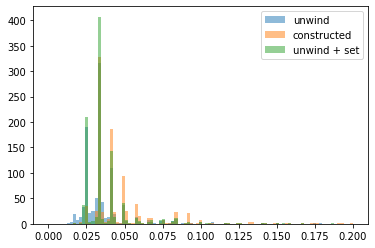

In [16]:
import random
import numpy
from matplotlib import pyplot

bins = numpy.linspace(0, 0.2, 100)

pyplot.hist(all_times_unwind_2, bins, alpha=0.5, label='unwind')
pyplot.hist(all_times_constructed_2, bins, alpha=0.5, label='constructed')
pyplot.hist(all_times_unwind_3, bins, alpha=0.5, label='unwind + set')
pyplot.legend(loc='upper right')
pyplot.show()

In [18]:
print("max time constructed:", np.max(all_times_constructed_2))
print("max time unwind:", np.max(all_times_unwind_2))
print("max time unwind + set:", np.max(all_times_unwind_3))

max time constructed: 55.73025465011597
max time unwind: 1.1092188358306885
max time unwind + set: 1.0156886577606201
